<table bgcolor=#ffffff align="center" width="100%" noborder>
    <tr>
        <td align="left" width="30%"><img src="images/IST_logo.png" width="50%"></td>
        <td width="40%"></td>
        <td align="right" width="30%"><img src="images/ds_logo.png" width="25%"></td>
    </tr>
    <tr><td align="left" width="30%"></td>
        <td width="40%"><p align="center"><img src="images/title.png"</td>
        <td align="right" width="30%"></td>
    </tr>
</table>

<h1 align="center" style="font-family:Arial;color:#6c6c6c;font-size:30px;">Lab 1: Data Exploration</h1>

The first step in every data science project is to explore the existing data. In order to do that, you need to load each
data file available, and analyze it careful and systematically.

<p align="center"><img src="images/data_exploration.png" width="50%">

From now on, we will make use of the functions previously defined to plot charts, available in the different notebooks 
in our course and saved in the <i>functions.ipynb</i> file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%load functions.ipynb
import ipynb.fs.defs.functions as func

<h2 style="font-family:Arial;color:#6c6c6c;font-size:25px;">Content identification</h2>

Analyzing the data starts with the characterization of the dataset, namely:
- recognizing the number of records
- and acknowledging the number of variables 

These two tasks are easily done after loading the data into a <code>DataFrame</code> through the <code>read_csv</code> 
method (as seen in <a href="Lab01_pandas.ipynb#loading">Lab01 - Loading data with pandas</a>)

For example, the property <code>shape</code> is a tuple containing the number of records and the number of variables 
describing the data.

In [2]:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
data = pd.read_csv('data/algae2.csv', index_col='date', parse_dates=True, infer_datetime_format=True)
data.shape

(200, 11)

<h2 id="single_var" style="font-family:Arial;color:#6c6c6c;font-size:25px;">Single Variable Analysis</h2>
<h3 style="font-family:Arial;color:#6c6c6c;font-size:20px;font-style:italic;">Variables Type and Domain</h3>

After loading the data, we proceed with the analysis of each variable by itself, non relating them with each other. 
This analysis depends on each variables type, which in a <code>DataFrame</code> has one of the numpy types (float, 
int, bool, timedelta64[ns] and datetime64[ns]), or one of 
<a href="https://pandas.pydata.org/pandas-docs/stable/ecosystem.html#ecosystem-extensions">pandas extension types.</a>

The property <code>dtypes</code> applied to the data object, returns a pandas <code>Series</code> with all the names 
of the variables in the dataset, and their corresponding types.

In [3]:
data.dtypes

pH                float64
Oxygen            float64
Chloride          float64
Nitrates          float64
Ammonium          float64
Orthophosphate    float64
Phosphate         float64
Chlorophyll       float64
fluid_velocity     object
river_depth        object
season             object
dtype: object

From the results shown, we see that from the 11 variables, 8 are numeric (<code>float64</code>) and 3 are 
non-numeric (<i>season, river_depth</i> and <i>fluid_velocity</i>).

In order to explore those 3 variables, lets see what are the values for each one of them. For that we can select just 
the non-numeric variables directly through <code>select_dtypes</code> method, returning a Series object. Then apply 
the <code>unique</code> method to each column.

In [4]:
cat_vars = data.select_dtypes(include='object')
for att in cat_vars:
    print(att, data[att].unique())

fluid_velocity ['medium' 'high' 'low']
river_depth ['low' 'medium' 'high']
season ['autumn' 'winter' 'spring' 'summer']


As we can see, all the 3 variables present a few different string values, which means that they should be categorical 
variables.

In order to change the dataframe, we can cast the data values to be recognized as categorical, through the application 
of the <code>astype</code> method to each column in the dataframe. 

In [5]:
data[cat_vars.columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
data.dtypes

pH                 float64
Oxygen             float64
Chloride           float64
Nitrates           float64
Ammonium           float64
Orthophosphate     float64
Phosphate          float64
Chlorophyll        float64
fluid_velocity    category
river_depth       category
season            category
dtype: object

<h3 style="font-family:Arial;color:#6c6c6c;font-size:20px;font-style:italic;">Missing values</h3>

Another important issue when dealing with large datasets is to analyse the existence of missing data. A simple way to
identify the proportions of this problem is just use the <code>isna</code> command. You can analyze the numbers by plotting 
them through a bar chart.

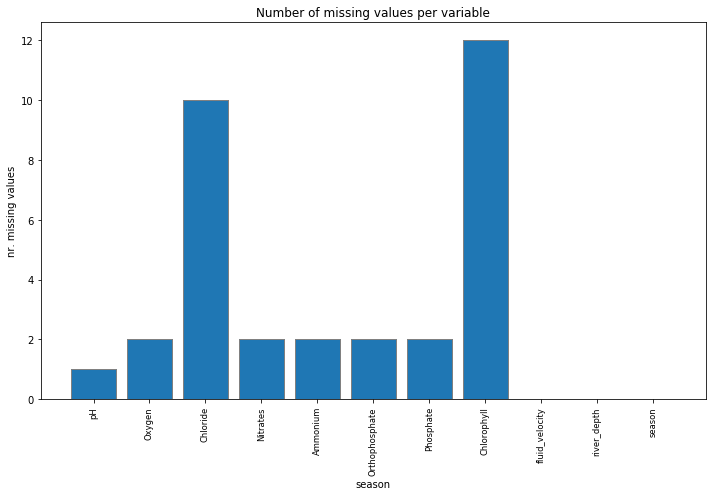

In [6]:
fig = plt.figure(figsize=(10,7))
mv = {}
for var in data:
    mv[var] = data[var].isna().sum()
    func.bar_chart(plt.gca(), mv.keys(), mv.values(), 'Number of missing values per variable', var, 'nr. missing values')
fig.tight_layout()
plt.show()

<h3 style="font-family:Arial;color:#6c6c6c;font-size:20px;font-style:italic;">Variables Distribution</h3>

As seen above, getting the different values of a categorical variable is trivial, but the same does not fit numeric 
ones. Indeed, we don't want to see all values assumed by a real variable.

For numeric variables, the way to inspect their range encompasses studying their minimum and maximum values, along 
with other estimators, like the mean, mode, standard deviation and other different percentiles, which allows for the best
description of this kind of variables.

The <code>describe</code> method, applied to the dataframe, gives the 5-number summary for each numeric variable.

In [7]:
data.describe()

,pH,Oxygen,Chloride,Nitrates,Ammonium,Orthophosphate,Phosphate,Chlorophyll
count,199.000000,198.000000,190.000000,198.000000,198.000000,198.000000,198.000000,188.000000
mean,8.011759,9.117778,43.636842,3.282828,154.447475,83.325909,111.550808,13.541011
std,0.598302,2.391253,46.830993,3.776458,180.011207,116.783165,102.214088,20.448323
min,5.600000,1.500000,0.220000,0.050000,5.000000,1.000000,0.900000,0.000000
25%,7.700000,7.725000,10.985000,1.297500,35.625000,16.000000,19.395000,2.000000
50%,8.060000,9.800000,32.730000,2.675000,99.665000,41.400000,84.500000,5.200000
75%,8.400000,10.800000,57.825000,4.447500,203.730000,102.247500,182.160000,18.300000
max,9.700000,13.400000,391.500000,45.650000,931.830000,771.600000,558.750000,110.460000


Note that by default, the <code>describe</code> command only shows the summary for numeric variables. In order to 
inspect all of them, we can require all through <code>data.describe(include='all')</code>

Those numbers alone, give all the information required, but it's not easy to interpret. A better way to understand the 
impact of such values is through the analysis of boxplots for each variable.

In order to show such charts, we may use the <code>matplotlib</code> package, to define different routines for displaying 
the different charts needed to explore our data.

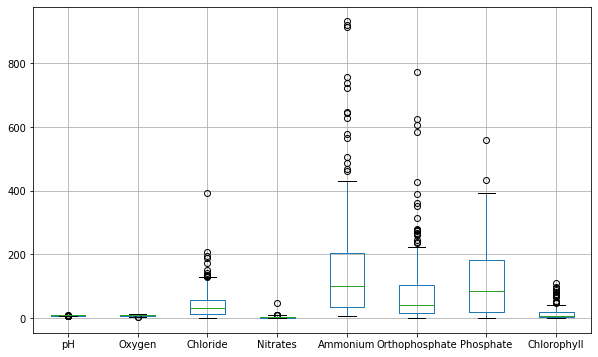

In [8]:
data.boxplot(figsize=(10,6))
plt.show() 

Despite the ability to see the relations among the different value ranges for all variables, it is difficult to analyze 
each one in particular, due to the different scales.

In order to address this difference, we can plot singular boxplots for each variable using <code>boxplot</code> methods
from <code>matplotlib</code>.

<Figure size 432x288 with 0 Axes>

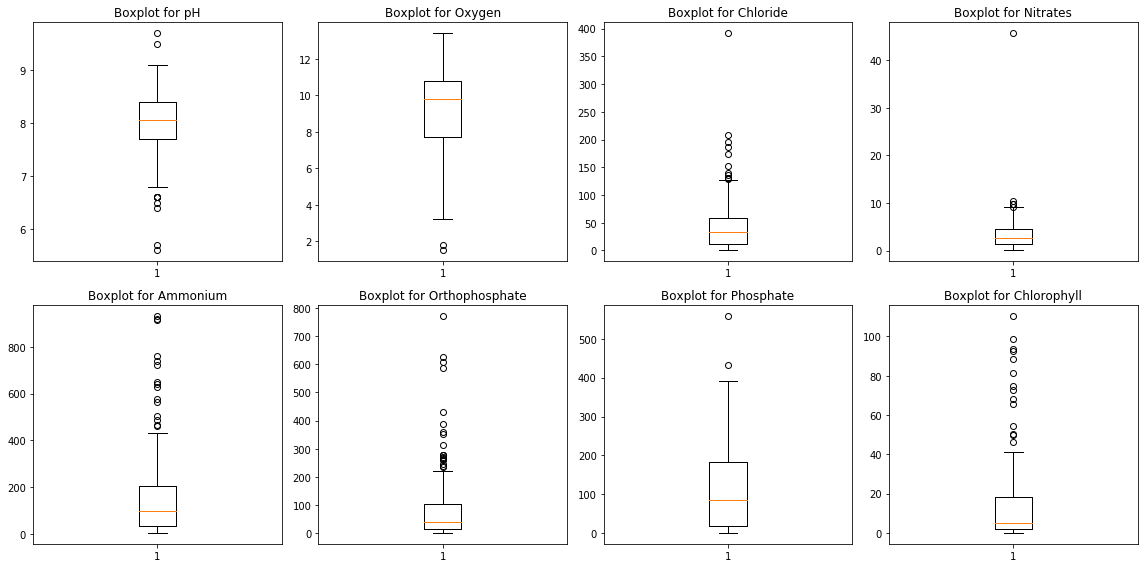

In [9]:
columns = data.select_dtypes(include='number').columns
rows, cols = func.choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Boxplot for %s'%columns[n])
    axs[i, j].boxplot(data[columns[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

Another possibility is to plot the histogram for each numeric variable, through the use of <code>hist</code> method.

<Figure size 432x288 with 0 Axes>

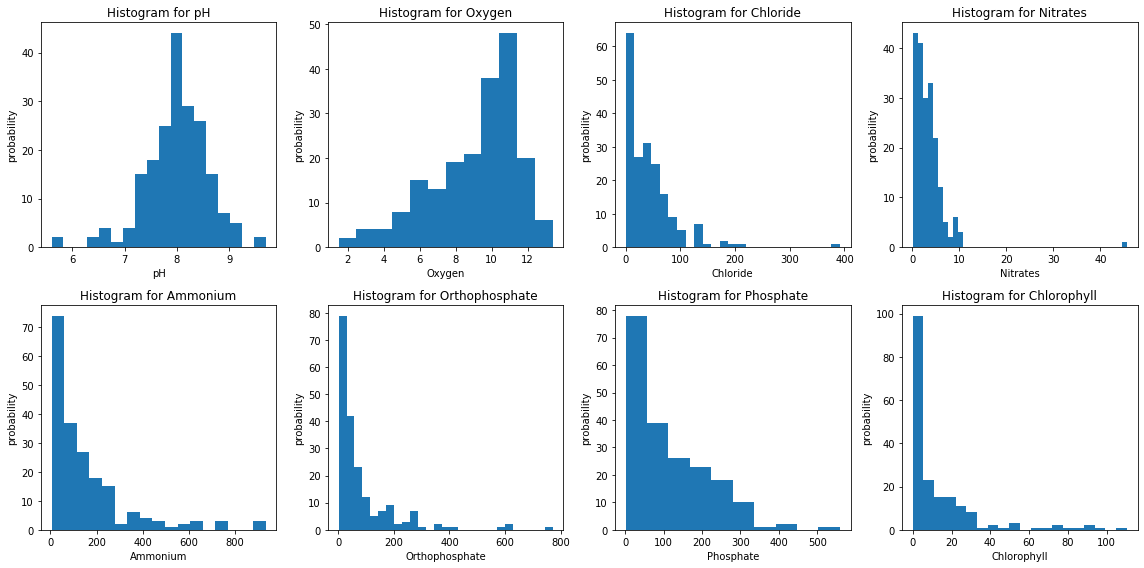

In [10]:
columns = data.select_dtypes(include='number').columns
rows, cols = func.choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Histogram for %s'%columns[n])
    axs[i, j].set_xlabel(columns[n])
    axs[i, j].set_ylabel("probability")
    axs[i, j].hist(data[columns[n]].dropna().values, 'auto')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

Histograms for categorical variables may also be produced, just through the use of bar charts and counting the frequency
of each value for each variable.

<Figure size 432x288 with 0 Axes>

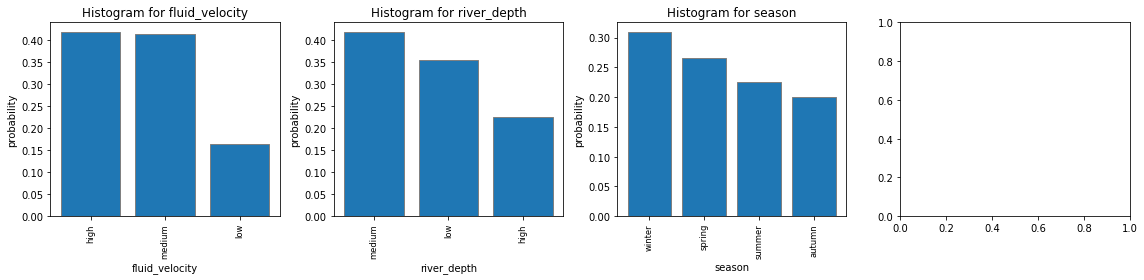

In [11]:
columns = data.select_dtypes(include='category').columns
rows, cols = func.choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    counts = data[columns[n]].dropna().value_counts(normalize=True)
    func.bar_chart(axs[i, j], counts.index, counts.values, 'Histogram for %s'%columns[n], columns[n], 'probability')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

Indeed histograms give us an insight about the distribution of each variable, but recognizing the distribution that 
best fits the data may be hard.
<code>Seaborn</code> provides the <code>distplot</code> method to display the best fit for the variable. See for example 
the best fits for pH and Ammonium variables:

<Figure size 432x288 with 0 Axes>

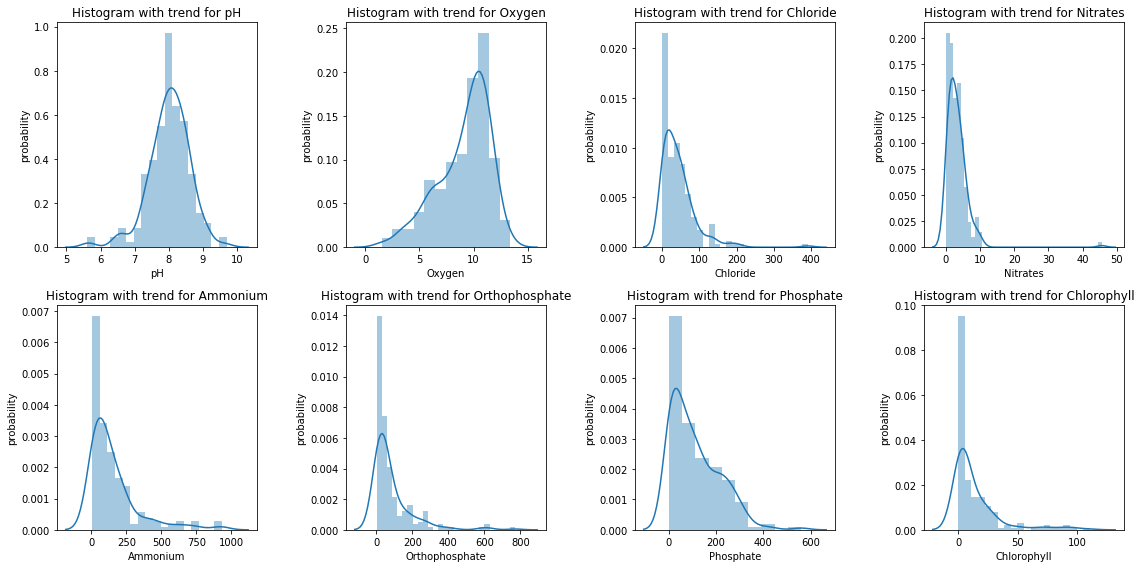

In [12]:
import seaborn as sns

columns = data.select_dtypes(include='number').columns
rows, cols = func.choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Histogram with trend for %s'%columns[n])
    axs[i, j].set_ylabel("probability")
    sns.distplot(data[columns[n]].dropna().values, norm_hist=True, ax=axs[i, j], axlabel=columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

Despite the simplicity of this approach, we are not able to verify how much standard distributions fit to the data. 
In order to do that, we can try to fit different known distributions to it, using <code>scipy.stats</code> package
functionalities to compute distributions (<code>norm, expon, skewnorm, etc</code>).
Lets look at the histogram for the pH and Ammonium variables, and possible distributions...

<Figure size 432x288 with 0 Axes>

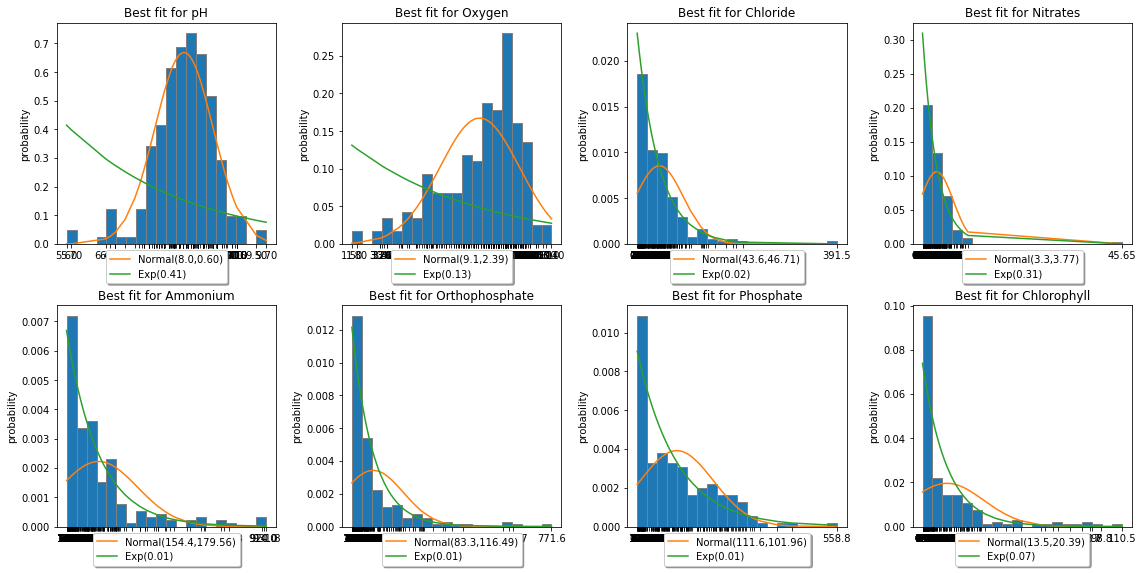

In [13]:
import scipy.stats as _stats 
def compute_known_distributions(x_values, n_bins) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # LogNorm
  #  sigma, loc, scale = _stats.lognorm.fit(x_values)
  #  distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    # Exponential
    loc, scale = _stats.expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # SkewNorm
   # a, loc, scale = _stats.skewnorm.fit(x_values)
   # distributions['SkewNorm(%.2f)'%a] = _stats.skewnorm.pdf(x_values, a, loc, scale) 
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, var: str):
    values = series.sort_values().values
    n, bins, patches = ax.hist(values, 20, density=True, edgecolor='grey')
    distributions = compute_known_distributions(values, bins)
    func.multiple_line_chart(ax, values, distributions, 'Best fit for %s'%var, var, 'probability')

columns = data.select_dtypes(include='number').columns
rows, cols = func.choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    histogram_with_distributions(axs[i, j], data[columns[n]].dropna(), columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<h3 style="font-family:Arial;color:#6c6c6c;font-size:20px;font-style:italic;">Granularity</h3>

At last, the granularity at which we analyze each variable also plays a fundamental role. Indeed, when we plot the histogram for each variable, we have to determine the number of bins used to discretize the data. Until now, we used the default value for the <code>hist</code> method (<code>nbins='auto'</code>), which chooses it according to 
In the next figure, we show five different discretizations for each numeric variable. From these charts, we can se that each bin in the first discretization accumulates a large different frequent values. Comparing the first to the last one (with 5 and 90 bins, respectively) is easy to understand the differences shapes in the variable distribution.
Naturaly, for a numeric variable, the highest the number of bins, closer it will be to the real distribution of the data. 

<Figure size 432x288 with 0 Axes>

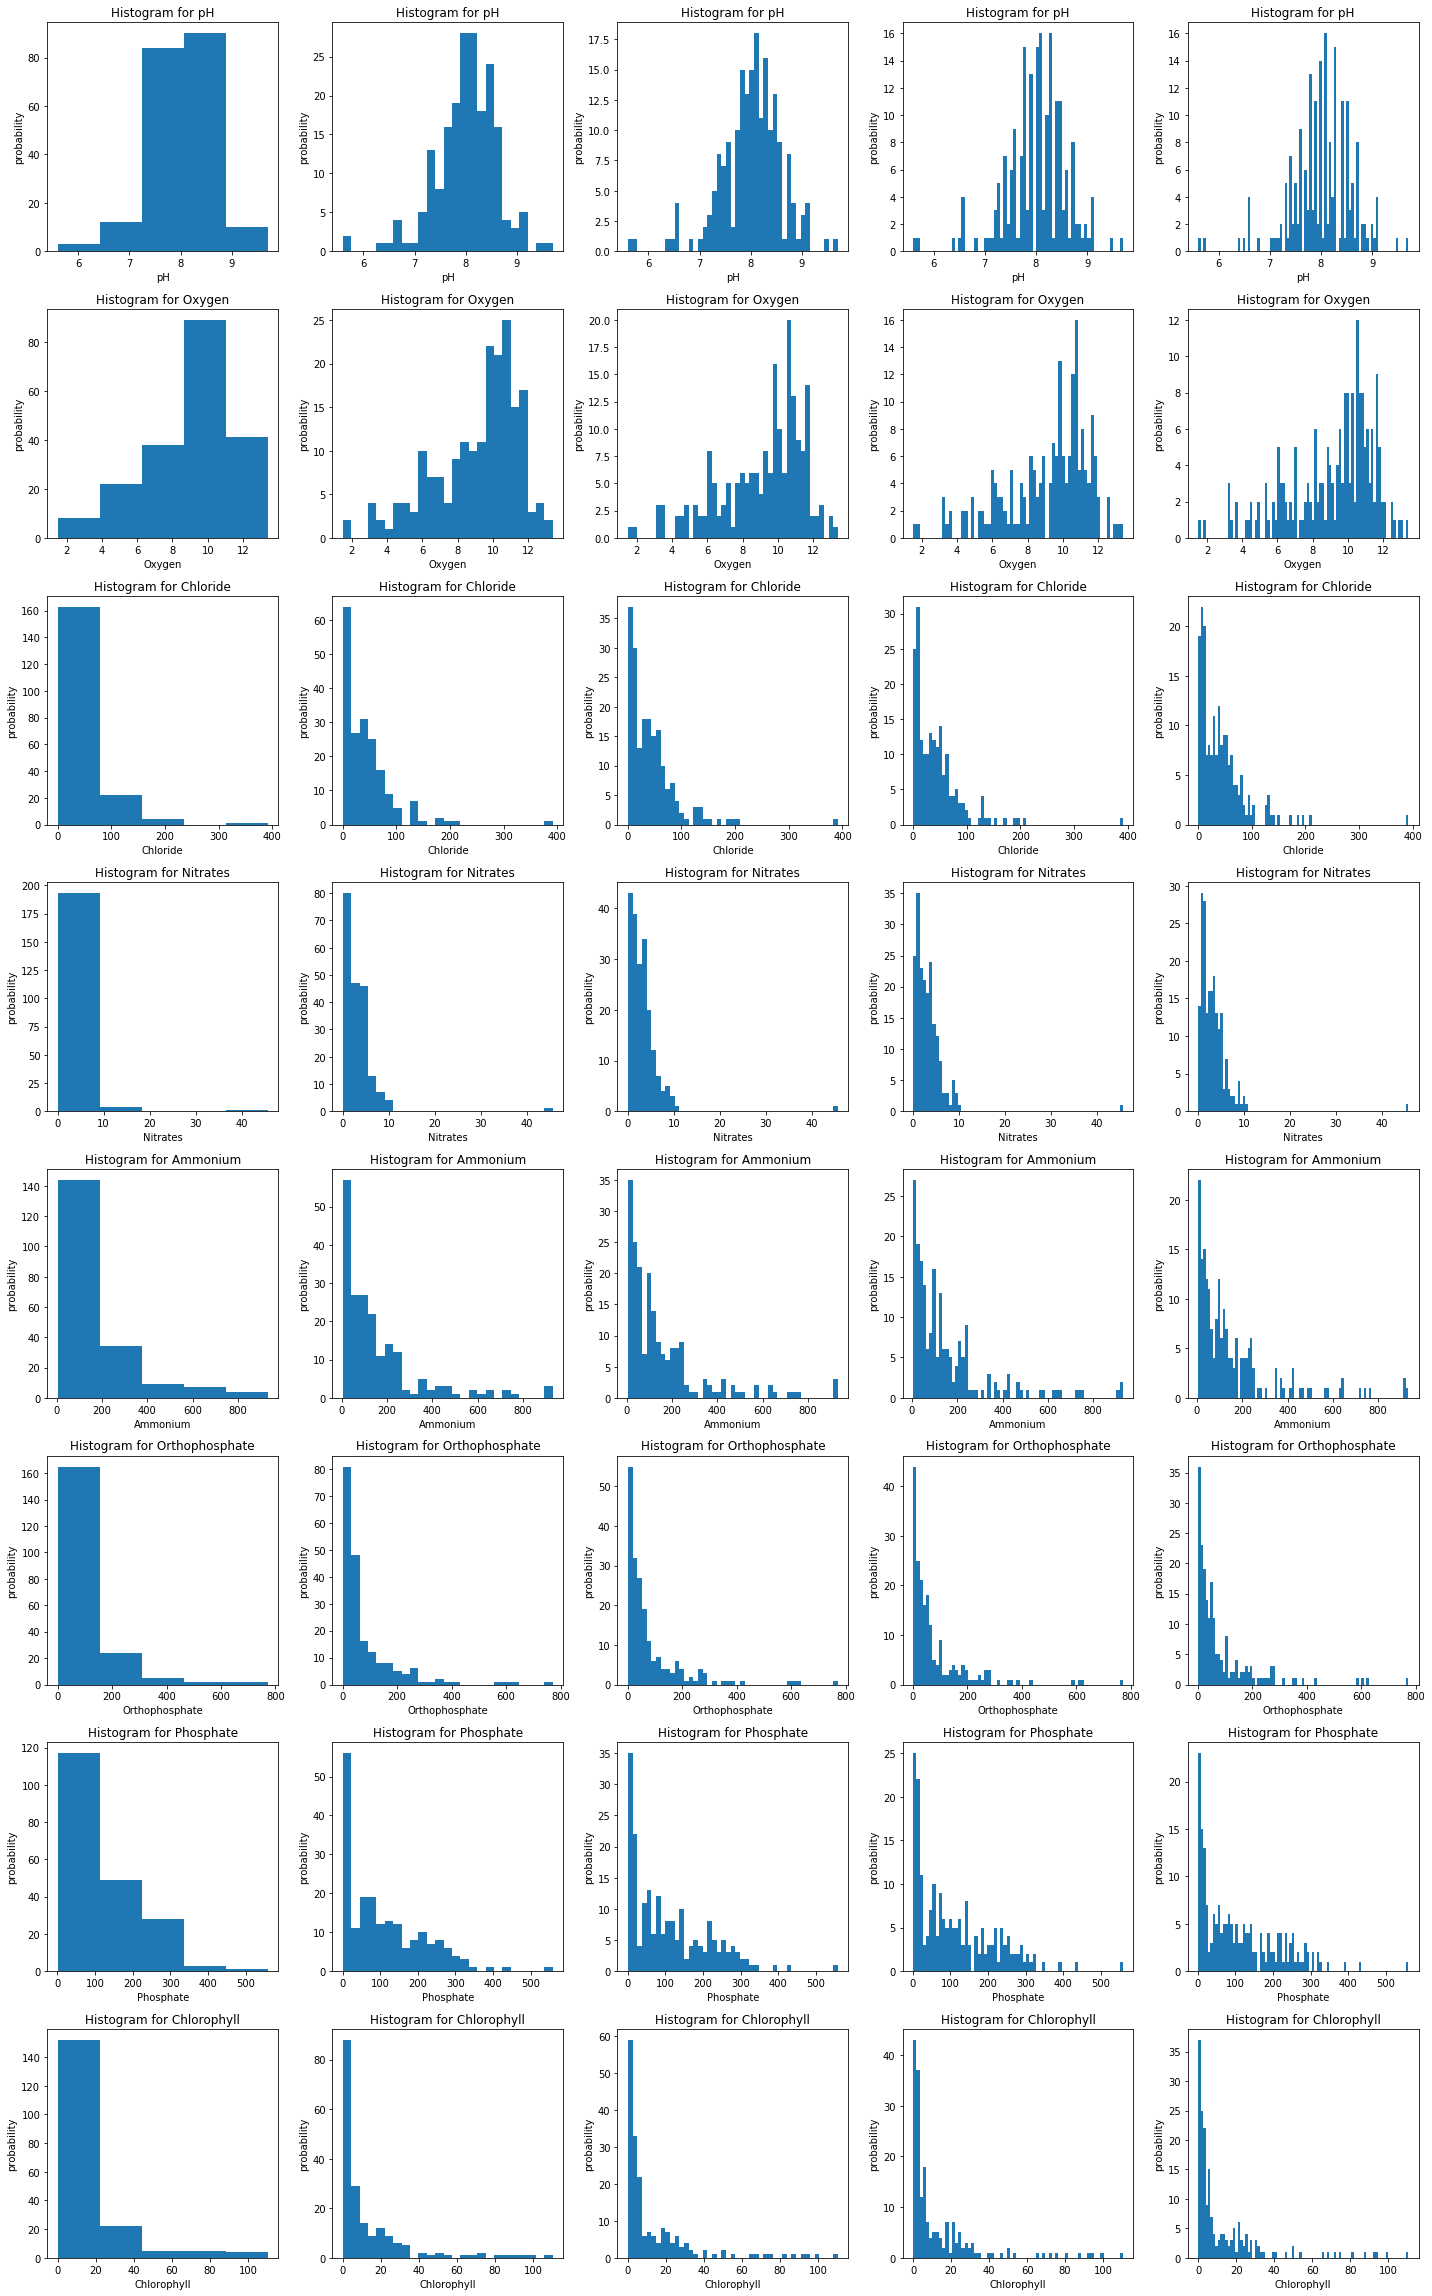

In [14]:
columns = data.select_dtypes(include='number').columns
rows = len(columns)
cols = 5
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
bins = range(5, 100, 20)
for i in range(len(columns)):
    for j in range(len(bins)):
        axs[i, j].set_title('Histogram for %s'%columns[i])
        axs[i, j].set_xlabel(columns[i])
        axs[i, j].set_ylabel("probability")
        axs[i, j].hist(data[columns[i]].dropna().values, bins[j])
fig.tight_layout()
plt.show()

<table bgcolor=#ffffff align="center" width="100%" noborder>
    <tr>
        <td align="center" width="30%"><a href="Lab02_matplotlib.ipynb"><img src="images/prev.png"></a></td>
        <td width="40%"></td>
        <td align="center" width="30%"><a href="Lab11_multi_var.ipynb"><img src="images/next.png"></a></td>
    </tr>
</table>